<a href="https://colab.research.google.com/github/vannguyen3007/About/blob/master/HW3_Van_Nguyen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Evaluating White wine and Red wine Quality based on Several 





## A. RED Wine


##Objective :
1. Choosing the highest performance of model 
2. To determine which features are the most indicative of a good quality wine.

To build various classification models to predict whether a particular red wine is "good quality" or "Not". Each wine in this dataset is given a "quality" score between 0 and 10.

* In order to detecting the quality of wine, this dataset is given a "quality" score between 0 and 10. That may be converted the output to a binary output based on 2 types:

+ "good quality" (A score is higher 7)
+ "not quality" ( A score is below 7 ) 

Input variables of sample dataset. The quality of a wine is determined by 11 input variables:

1. Fixed acidity
2. Volatile acidity
3. Citric acid 
4. Residual sugar
5. Chlorides
6. Free sulfur dioxide
7. Total sulfur dioxide
8. Density
9. pH
10. Sulfates 
11. Alcohol







# Preparing dataset:


Link data:

https://archive.ics.uci.edu/ml/datasets/Wine+Quality

Reading data and EDA data

In [16]:
import numpy as np 
import pandas as pd 
import matplotlib as plt
import seaborn as sns
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("/content/winequality-red.csv", delimiter =";")

In [9]:
## Tracking the number of rows and columns:
print("Rows, columns: " + str(df.shape))

df.head(3)


Rows, columns: (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


That show a total 1599 rows and 12 columns

# Checking missing values


In [10]:
print(df.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


Checking the quality of sample data set via distribution. In this way to make sure that it enough "good quality" wines in dataset.

In [13]:
figure_01 = px.histogram(df, x = 'quality')
figure_01.show()

* Next, check the correlations between the relationship of variables.

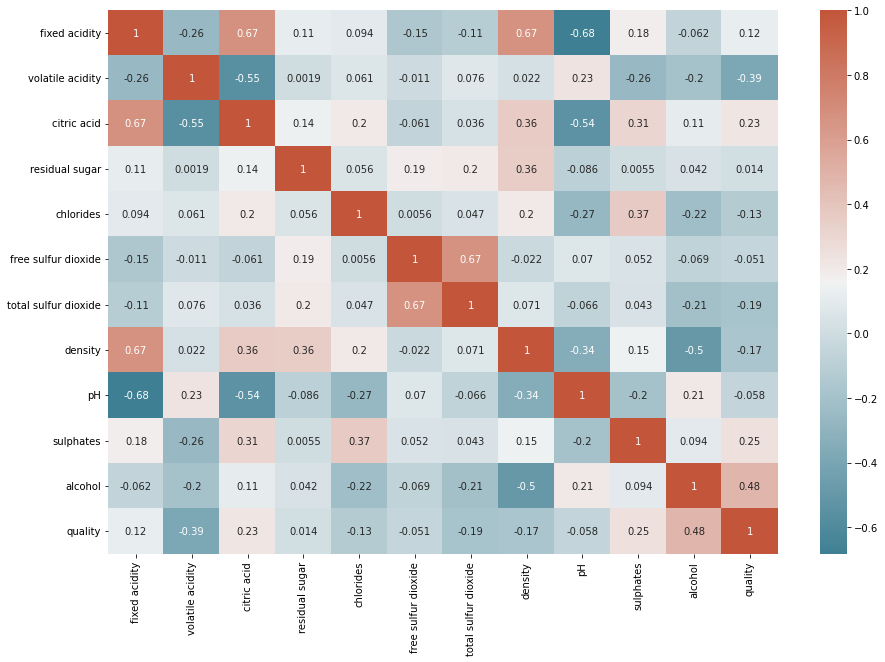

In [17]:
corr = df.corr()
matplotlib.pyplot.subplots(figsize=(15,10))

# Using seabon to check heatmap to correlation

sns.heatmap(corr, xticklabels=corr.columns, 
            yticklabels = corr.columns, annot = True, 
            cmap = sns.diverging_palette(220, 20, as_cmap = True))

Transfer to a Classiofication Problem

In [20]:
# Create Classification to good quality and bad quality

df['goodquality'] = [1 if x>=7 else 0
                        for x in df['quality']]


# Separate feature variables and target:


In [22]:
X = df.drop(['quality', 'goodquality'], axis = 1)
y = df['goodquality']

## Comparing a Good and Bad Wines. That may be derivated unbalanced dataset. ? 

In [23]:
## Check portion of all 
df['goodquality'].value_counts()

0    1382
1     217
Name: goodquality, dtype: int64

* Check Normalization data:
+ Standardizing the data means that it will transform the data, which will have a mean of 0, standard deviation of 1.


In [24]:
#  Normalize features variables:
from sklearn.preprocessing import StandardScaler
X_features = X
X = StandardScaler().fit_transform(X)

In [26]:
# Cross-validate models and detect their effectiveness.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 0)

#These kinds of model using for data set.

# 1. Decision Tree

In [27]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier 


model1 = DecisionTreeClassifier(random_state = 1)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test) 

print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       355
           1       0.53      0.73      0.62        45

    accuracy                           0.90       400
   macro avg       0.75      0.83      0.78       400
weighted avg       0.92      0.90      0.90       400



## 2. Random Forest

Random forests are an ensemble learning technique that builds off of decision trees, which using "boostrapped datasets" of the original data.


In [29]:
from sklearn.ensemble import RandomForestClassifier 
model2 = RandomForestClassifier(random_state = 1)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)  

print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       355
           1       0.68      0.58      0.63        45

    accuracy                           0.92       400
   macro avg       0.82      0.77      0.79       400
weighted avg       0.92      0.92      0.92       400



# 3. AdaBoost

Learn about the differences between the three methods ( AdaBoost, Gradient Boosting, and XGBoosting)

In [30]:
# 3.1 AdaBoost:

from sklearn.ensemble import AdaBoostClassifier 
model3 = AdaBoostClassifier(random_state = 1)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test) 


print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       355
           1       0.51      0.49      0.50        45

    accuracy                           0.89       400
   macro avg       0.72      0.71      0.72       400
weighted avg       0.89      0.89      0.89       400



In [31]:
  # 3.2 : Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier
model4 = GradientBoostingClassifier(random_state=1)
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       355
           1       0.52      0.51      0.52        45

    accuracy                           0.89       400
   macro avg       0.73      0.73      0.73       400
weighted avg       0.89      0.89      0.89       400



In [32]:
#3.3: XGBoost
import xgboost as xgb
model5 = xgb.XGBClassifier(random_state=1)
model5.fit(X_train, y_train)
y_pred5 = model5.predict(X_test)
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       355
           1       0.57      0.56      0.56        45

    accuracy                           0.90       400
   macro avg       0.76      0.75      0.75       400
weighted avg       0.90      0.90      0.90       400



## B.WHITE Wine

## Step 1: EDA data

In [33]:
import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns
import pandas as pd 
import numpy as np 
from sklearn import metrics

In [34]:
## Reading data

df_white = pd.read_csv("/content/winequality-white.csv", delimiter =";")

In [36]:
df_white.shape

(4898, 12)

In [38]:
# Check missing values

df_white.isnull().any()


fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [39]:
df_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



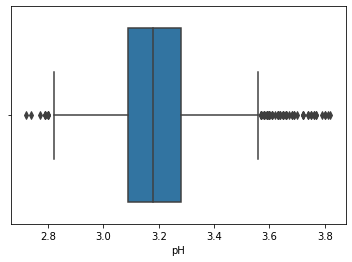

In [40]:
sns.boxplot(df_white['pH'])

In [42]:
# Drop ouliers by Z-score

Z = np.abs(stats.zscore(df_white))
df_white = df_white[(Z < 3).all(axis =1)]
df_white.shape

(4487, 12)

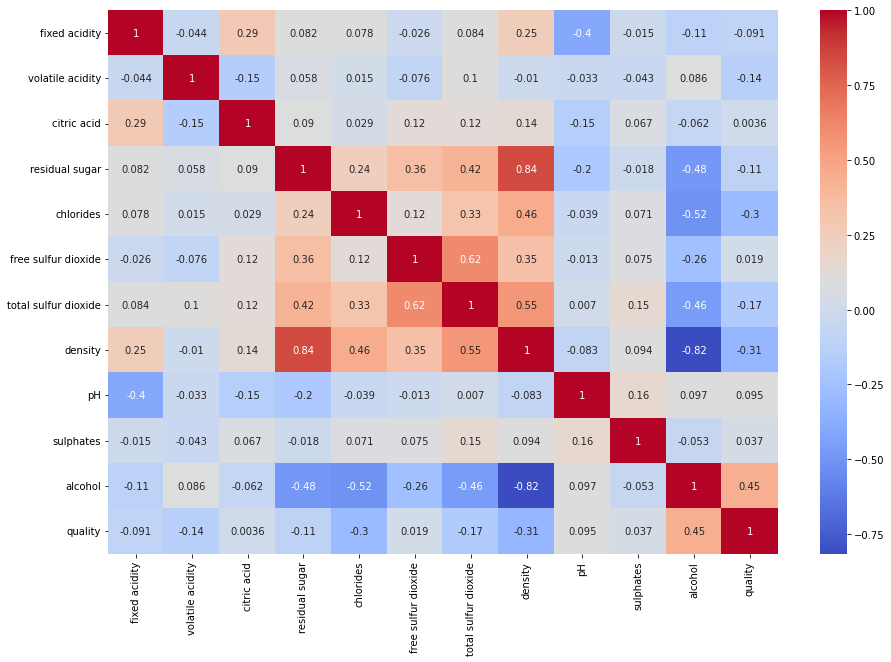

In [44]:
## Checking the correlation between attributes 

plt.subplots(figsize=(15,10))
sns.heatmap(df_white.corr(), annot = True, cmap = 'coolwarm')

In [45]:
## Checking imabalance 

df_white['quality'].value_counts()

6    2038
5    1309
7     855
8     161
4     124
Name: quality, dtype: int64

## Processing Data:

Splitting the dataset into training and test sets 80% and 20%, respectively.

In [46]:
# Define features X

X = np.asarray(df_white.iloc[:, :-1]) 

# Define target y 
y = np.asarray(df_white['quality'])

In [47]:
# Normalize data

from sklearn import preprocessing 
X = preprocessing.StandardScaler().fit(X).transform(X)


In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)
print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (3589, 11) (3589,)
Test set: (898, 11) (898,)


Using LOGISTIC REGRESSION

In [59]:
# import module
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score


# Train and fit model
logreg = LogisticRegression(multi_class='multinomial',solver ='newton-cg')
logreg.fit(X_train, y_train)
# Predict out-of-sample test set
y_pred = logreg.predict(X_test)
# classification report
print(metrics.classification_report(y_test, y_pred, digits=3, zero_division = 1))
print('accuracy',accuracy_score(y_test, y_pred))
# Calculate cv score with ‘roc_auc_ovr’ scoring and 10 folds
accuracy = cross_val_score(logreg, X, y, scoring = 'roc_auc_ovr',cv=10)
print('cross validation score with roc_auc',accuracy.mean())
# Calculate roc_auc score with multiclass parameter
print('roc_auc_score',roc_auc_score(y_test,logreg.predict_proba(X_test), multi_class='ovr'))

              precision    recall  f1-score   support

           4      1.000     0.000     0.000        27
           5      0.580     0.470     0.519       270
           6      0.513     0.745     0.608       411
           7      0.458     0.228     0.304       167
           8      1.000     0.000     0.000        23

    accuracy                          0.524       898
   macro avg      0.710     0.288     0.286       898
weighted avg      0.550     0.524     0.491       898

accuracy 0.5244988864142539
cross validation score with roc_auc 0.742497984671654
roc_auc_score 0.7538056699952047


## 2. DECISION TREE

In [60]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(random_state=1)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           4       0.33      0.19      0.24        27
           5       0.66      0.60      0.63       270
           6       0.68      0.68      0.68       411
           7       0.56      0.63      0.60       167
           8       0.37      0.57      0.45        23

    accuracy                           0.63       898
   macro avg       0.52      0.53      0.52       898
weighted avg       0.63      0.63      0.63       898



## 3. AdaBoost

In [61]:
from sklearn.ensemble import AdaBoostClassifier
model3 = AdaBoostClassifier(random_state=1)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           4       0.16      0.30      0.21        27
           5       0.51      0.32      0.39       270
           6       0.50      0.59      0.54       411
           7       0.38      0.22      0.27       167
           8       0.08      0.35      0.14        23

    accuracy                           0.42       898
   macro avg       0.32      0.35      0.31       898
weighted avg       0.46      0.42      0.42       898



## SMOTE algorithm

In [62]:
# Import SMOTE module
from imblearn.over_sampling import SMOTE
# Create model and fit the training set to create a new training set
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())
# Create random forest model
forest = RandomForestClassifier(n_estimators=100,random_state = 0)
# Fit the model to the new train set
forest.fit(X_train_res, y_train_res.ravel())
# # Test out-of-sample test set
y_pred = forest.predict(X_test)
# Classification report
print(metrics.classification_report(y_test, y_pred.round(), digits=3))
# Calculate cv score with 'roc_auc_ovr' scoring and 10 folds
accuracy = cross_val_score(forest, X, y,scoring = 'roc_auc_ovr',cv=10)
print('cross validation score with roc_auc_ovr scoring',accuracy.mean())
# Calculate roc_auc score with multiclass parameter
print('roc_auc_score',roc_auc_score(y_test,forest.predict_proba(X_test), multi_class='ovr'))

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing i

              precision    recall  f1-score   support

           4      0.462     0.444     0.453        27
           5      0.718     0.696     0.707       270
           6      0.702     0.701     0.702       411
           7      0.618     0.611     0.614       167
           8      0.400     0.609     0.483        23

    accuracy                          0.673       898
   macro avg      0.580     0.612     0.592       898
weighted avg      0.676     0.673     0.674       898

cross validation score with roc_auc_ovr scoring 0.7565877389842213
roc_auc_score 0.8969515816275242
